<a href="https://colab.research.google.com/github/Namith143namith/atme_dsml1/blob/main/DAY1ASS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Create dummy housing data
np.random.seed(42)
n = 200

df = pd.DataFrame({
    'price': np.random.randint(25000, 330000, n),
    'sqft_living': np.random.randint(50, 300, n),
    'bedrooms': np.random.randint(1, 5, n),
    'bathrooms': np.random.randint(1, 2, n),
    'floors': np.random.choice([1, 2], size=n),
    'date': pd.date_range(start='2018-01-01', periods=n, freq='W')
})

# Introduce some missing values
df.loc[np.random.choice(df.index, 10), 'price'] = np.nan
df.loc[np.random.choice(df.index, 5), 'sqft_living'] = np.nan

print(df.head())


      price  sqft_living  bedrooms  bathrooms  floors       date
0  146958.0          NaN         4          1       2 2018-01-07
1  171867.0        257.0         1          1       1 2018-01-14
2  156932.0        142.0         4          1       1 2018-01-21
3  284178.0         52.0         2          1       1 2018-01-28
4  144879.0        197.0         3          1       2 2018-02-04


In [7]:
df['price'] = df['price'].astype(float)
df['date'] = pd.to_datetime(df['date'])
# Price per square foot
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Extract year
df['year_sold'] = df['date'].dt.year

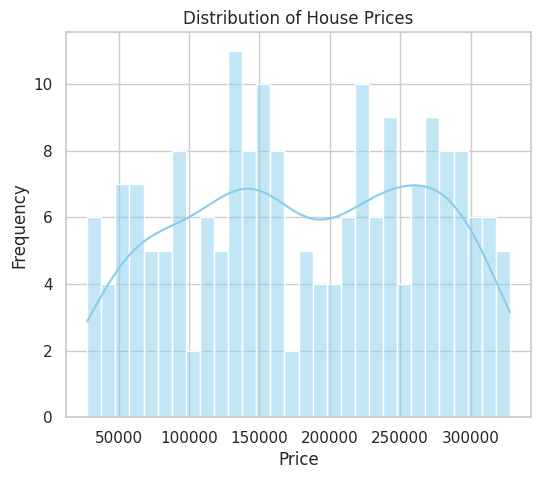

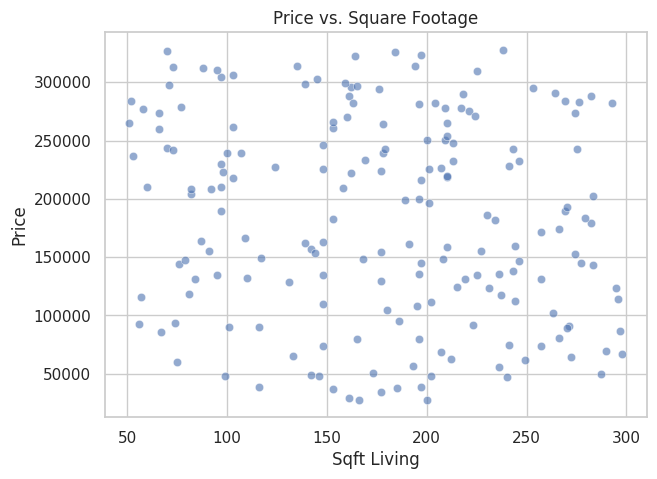

/tmp/ipython-input-8-1338092398.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=df, estimator=np.mean, palette="magma")


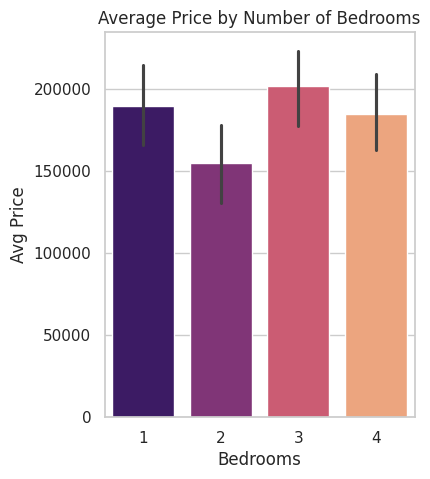

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# a. Distribution of Prices
plt.figure(figsize=(6, 5))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# b. Price vs. Sqft
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title("Price vs. Square Footage")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

# c. Avg Price by Bedrooms
plt.figure(figsize=(4, 5))
sns.barplot(x='bedrooms', y='price', data=df, estimator=np.mean, palette="magma")
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Avg Price")
plt.show()